# Importing Dataset

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/kumarvishal88/ml-assignment-1-datasets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: animeshpareek
Your Kaggle Key: ··········


100%|██████████| 50.1M/50.1M [00:00<00:00, 112MB/s] 


# Part -1 Images

In [ ]:
import time
class rand():
  seed=0
  a=397
  b=624
  m=0
  def __init__(self):
    self.seed=time.time()
  def ran(self,l,h):
    self.m = int(self.seed+1) << 2
    self.seed=(((self.a*self.seed)+self.b)%self.m)
    x=int(self.seed*h/(h-l))
    # print (l,"---")
    return x
  def randint(self,l,h):
    if(l==h):
      return l;
    return (l+self.ran(l,h))%(h+1)
  def choice(self,arr):
    return arr[self.randint(0,len(arr)-1)]
random=rand()

[Q1]

Imbalanced


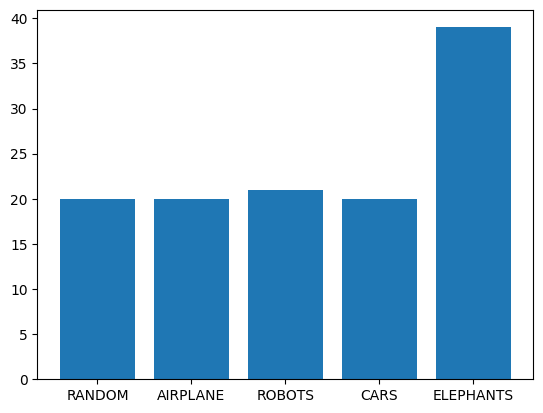

In [ ]:
import os
import matplotlib.pyplot as plt
path = "/content/ml-assignment-1-datasets/IMAGE_DATA/IMAGE_DATA"
l=[]
no_images=[]
imbalenced=False
x=[]
for image_class in os.listdir(path):
  x.append([(image,image_class) for image in os.listdir(path+"/"+str(image_class))]) # if(image.endswith(".jpeg") or image.endswith(".png") or image.endswith(".jpg"))
  no_images.append(len(x[-1]))
  l.append(str(image_class))
prev=no_images[0]
for i in no_images:
  if(i!=prev):
    imbalenced=True
    break;
print("Imbalanced" if(imbalenced) else "balanced" )
if(imbalenced):
  plt.bar(l,no_images)

Clearly our data of images is imbalanced .


```
To solve this we can either increase no of images of all image classes to 39 (over-sample the dataset)
or
remove extra images from Elephants and Robots to 20 (under sample the dataset)

(our aim -> Simply make no of images of all the image clases equal )
```




[Q2]

Image histograms of random 8 images of our dataset


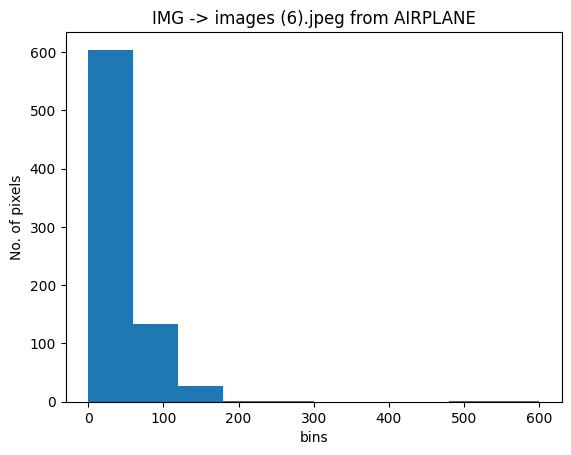

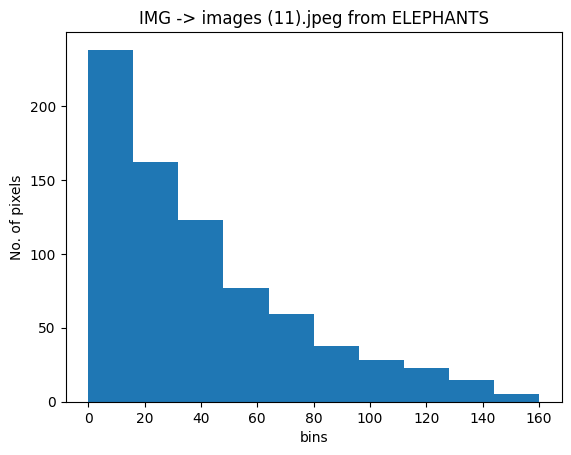

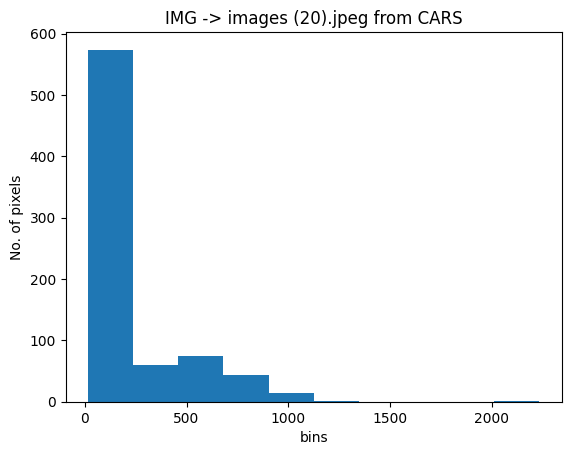

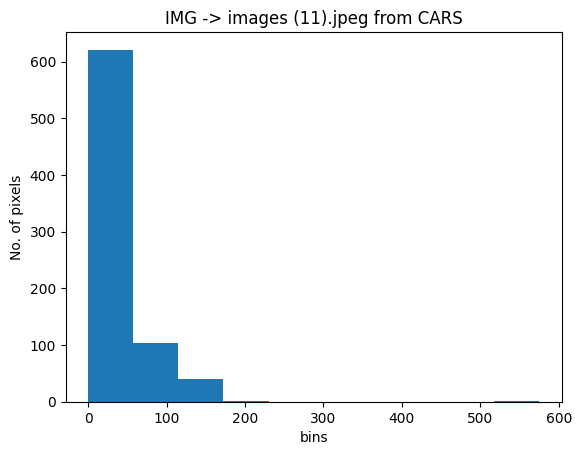

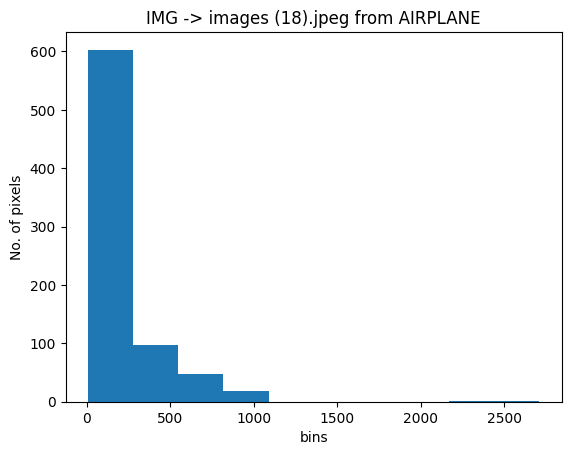

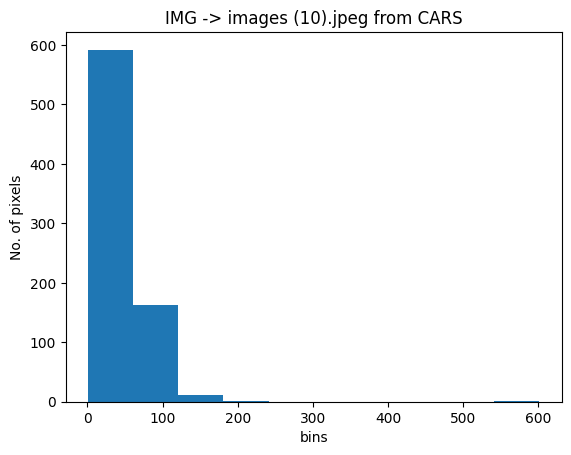

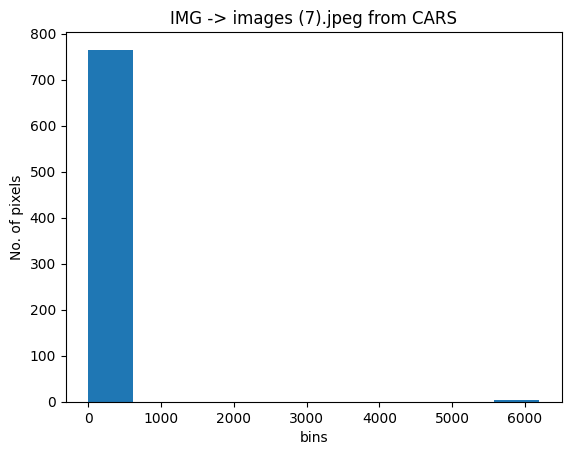

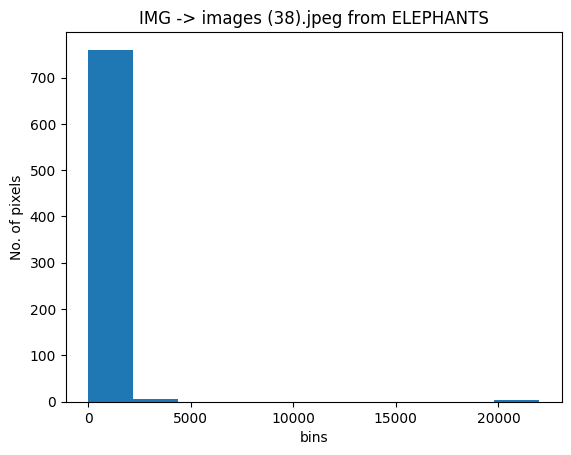

In [ ]:

from PIL import Image
print("Image histograms of random 8 images of our dataset")
kj=[]
while(len(kj)!=8):
  value=random.choice(x[random.randint(0,len(l)-1)])
  if(value not in kj):
    kj.append(value)
    plt.hist(Image.open(path+"/"+value[1]+"/"+value[0]).histogram())
    plt.title("IMG -> "+value[0]+" from "+value[1])
    plt.xlabel("bins")
    plt.ylabel("No. of pixels")
    plt.show()

[Q3]

In [ ]:
import numpy as np

for i in range(len(l)):
  r=np.array([])
  g=np.array([])
  b=np.array([])
  a=np.array([])
  p=np.array([])
  for value in x[i]:
    img=Image.open(path+"/"+value[1]+"/"+value[0])
    imgdata=np.array(img.getdata())
    if img.mode=="P":
      p=np.concatenate((p,imgdata))
    elif img.mode=="RGB":
      r=np.concatenate((r,imgdata[:,0]))
      g=np.concatenate((g,imgdata[:,1]))
      b=np.concatenate((b,imgdata[:,2]))
    elif img.mode=="RGBA":
      r=np.concatenate((r,imgdata[:,0]))
      g=np.concatenate((g,imgdata[:,1]))
      b=np.concatenate((b,imgdata[:,2]))
      a=np.concatenate((a,imgdata[:,3]))
    else:
      print("issue with unsopperted image mode")
  if a.size==0 :
    a=np.array([0])
  if p.size==0 :
    p=np.array([0])
  print("(R ,G, B, A, P)")
  print(l[i])
  print("MEAN ->  (",np.mean(r),", ",np.mean(g),", ",np.mean(b),", ",np.mean(a),", ",np.mean(p),")")
  print("Varience ->  (",np.var(r),", ",np.var(g),", ",np.var(b),", ",np.var(a),", ",np.var(p),")")
  print()


(R ,G, B, A, P)
RANDOM
MEAN ->  ( 145.17492740885416 ,  169.68360188802083 ,  227.05350895182292 ,  255.0 ,  0.0 )
Varience ->  ( 15429.777395518835 ,  12379.656582013418 ,  3181.207959220468 ,  0.0 ,  0.0 )

(R ,G, B, A, P)
AIRPLANE
MEAN ->  ( 128.88148112449798 ,  140.12375903614458 ,  159.68690120481926 ,  0.0 ,  0.8573 )
Varience ->  ( 4424.177133999041 ,  4270.416927877679 ,  5407.751524164535 ,  0.0 ,  10.90533671 )

(R ,G, B, A, P)
ROBOTS
MEAN ->  ( 145.09408617766087 ,  141.87490214628127 ,  141.0444193643865 ,  0.0 ,  9.1736 )
Varience ->  ( 7151.937409156726 ,  7171.861980129578 ,  7228.047524996186 ,  0.0 ,  660.2540630400001 )

(R ,G, B, A, P)
CARS
MEAN ->  ( 97.20519112495134 ,  103.21469832619697 ,  93.07635033086804 ,  0.0 ,  0.0 )
Varience ->  ( 6653.268787999673 ,  6503.588149860335 ,  6407.840411187503 ,  0.0 ,  0.0 )

(R ,G, B, A, P)
ELEPHANTS
MEAN ->  ( 132.20671846145544 ,  122.56847948427345 ,  106.0099569263211 ,  0.0 ,  0.0 )
Varience ->  ( 4647.735982025209 ,  


Inference->
```
By looking to our data we can observe that here differen clases have, diferent range of mean and variance.
And clearly Some of the classes have related mean while others dont have.
(Which could be helpful in doing classifications)

```



[Q4]

Before
Mean [142.06294922 160.32246745 230.45030273 255.        ]
STD [125.47137843 117.2066624   51.96202638   0.        ]


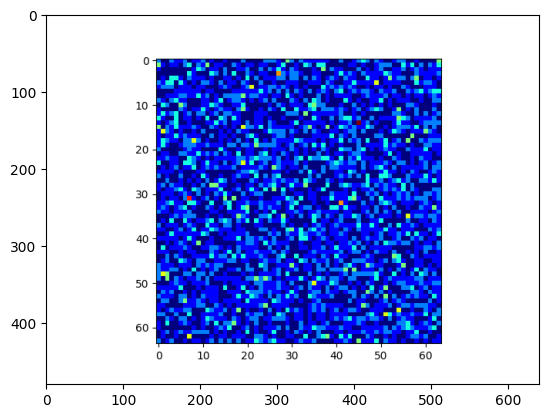

After
Mean [ 8.52024831e-15 -3.70409559e-13 -1.50064207e-13 -1.81748424e-17]
STD [1. 1. 1. 1.]


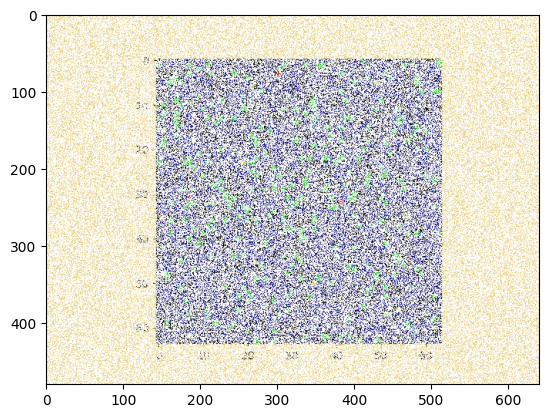


Before
Mean [145.72231445 172.68435872 226.34195638 255.        ]
STD [124.16727593 109.42204368  57.65994232   0.        ]


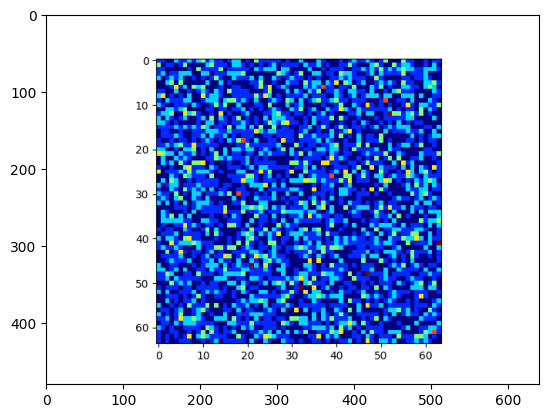

After
Mean [4.57429950e-13 2.97505931e-13 1.76283708e-13 1.16862538e-17]
STD [1. 1. 1. 1.]


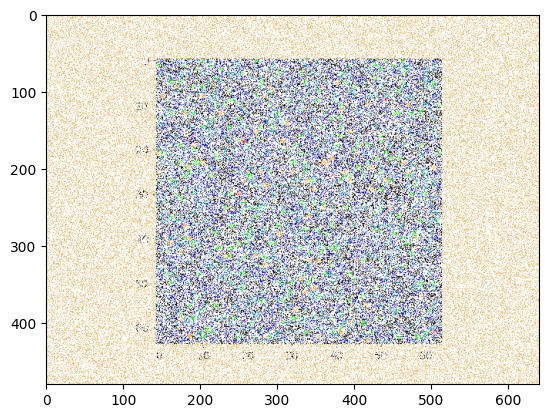


Before
Mean [143.90994466 165.25784831 228.09948568 255.        ]
STD [124.47339394 113.79814667  54.29835635   0.        ]


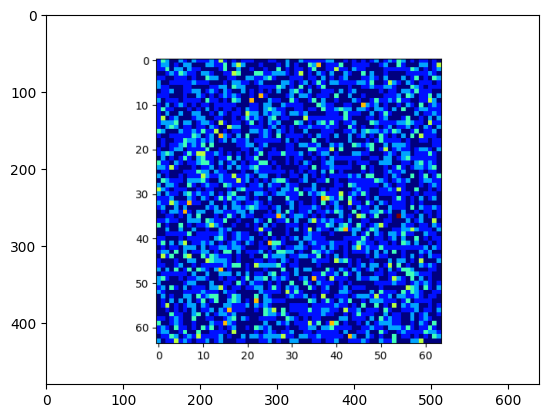

After
Mean [ 4.46009505e-13 -1.73385277e-13 -2.20661781e-13 -1.56575057e-17]
STD [1. 1. 1. 1.]


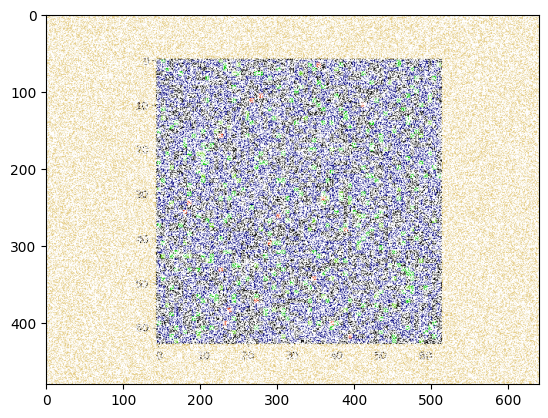


Before
Mean [143.58129557 165.18688802 228.13946289 255.        ]
STD [124.5515979  113.78956962  53.94697248   0.        ]


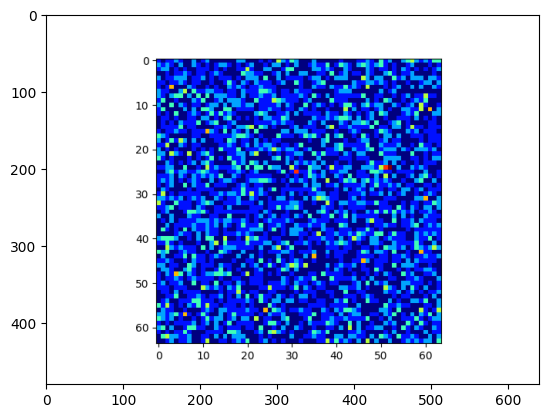

After
Mean [-3.83946611e-13  2.44317700e-13  7.93777381e-14 -1.16956502e-17]
STD [1. 1. 1. 1.]


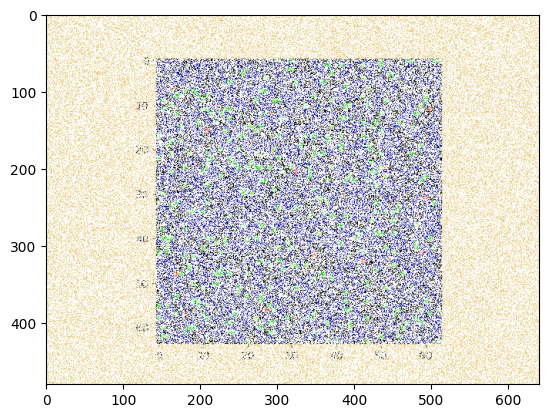

In [ ]:
kj=[]
def stn(a):
  m=np.mean(a)
  s=np.std(a)
  if(s==0):
    pass
    a=np.random.normal(0,1,a.shape)
    m=np.mean(a)
    s=np.std(a)
    a=(a-m)/s
  else:
    a=(a-m)/s
  return a;
while(len(kj)!=4):
  value=random.choice(x[0])
  if(value not in kj):
    kj.append(value)
    img=Image.open(path+"/"+value[1]+"/"+value[0])
    imgdata=np.asarray(img)
    print("Before")
    print("Mean",np.mean(imgdata,axis=(0,1)))
    print("STD",np.std(imgdata,axis=(0,1)))
    plt.imshow(imgdata)
    plt.show()
    kl=[(stn((imgdata[:,:,i]))) for i in range(imgdata.shape[2])]
    img2=np.stack(kl, axis=-1)
    print("After")
    print("Mean",np.mean(img2,axis=(0,1)))
    print("STD",np.std(img2,axis=(0,1)))
    # Image.fromarray(img2, str(img.mode)).save("save"+str(i)+".png")
    plt.imshow(img2)
    plt.show()
    print()

Observation ->


```
We were successfully able to standardize our Images.

We can see that these images have lesser intensity but clearer distinction.

Also, all the images are now on same plane thus making it easy to play around with them.
```



[Q5]

Before


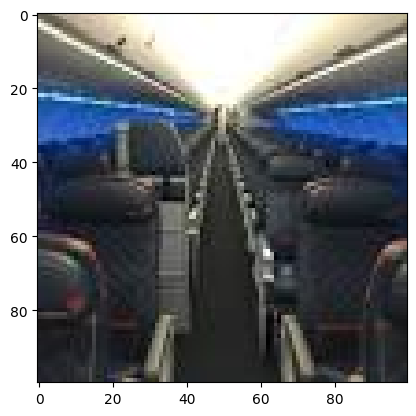

After


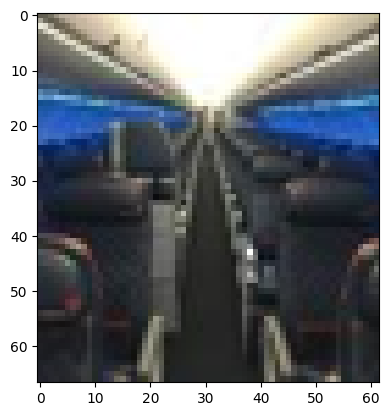

Before


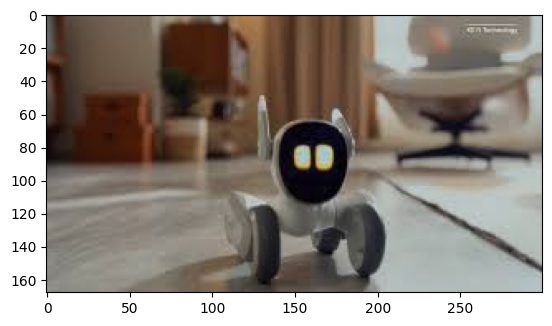

After


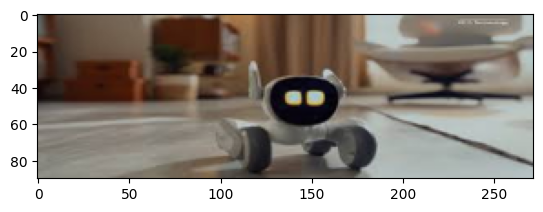

Before


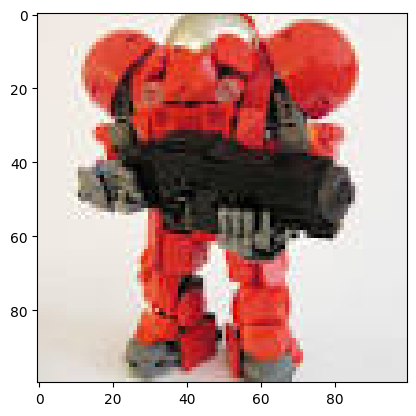

After


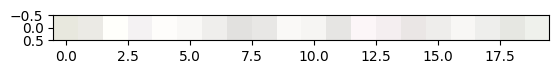

Before


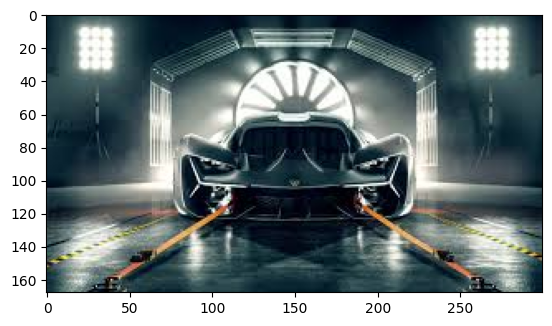

After


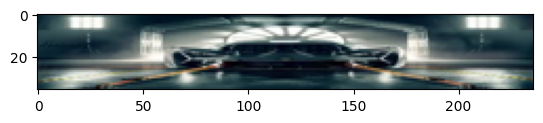

Before


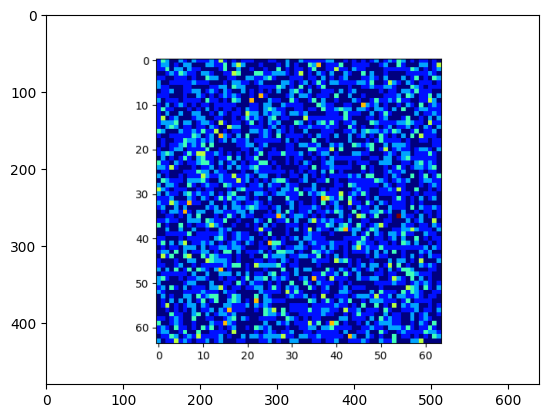

After


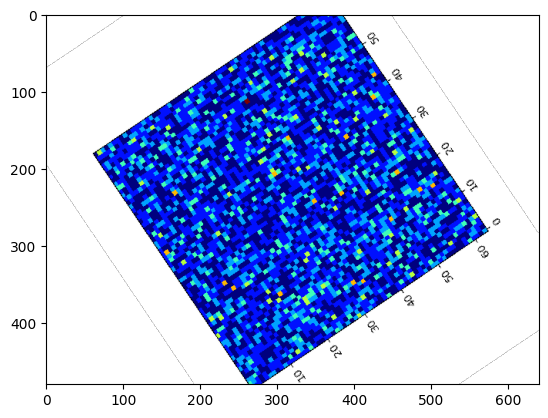

Before


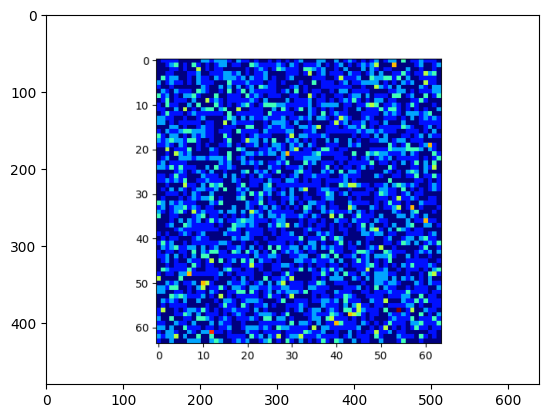

After


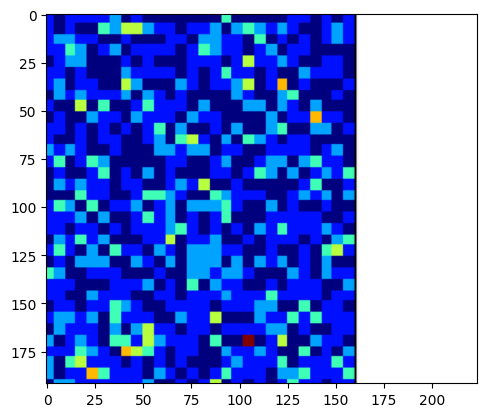

Before


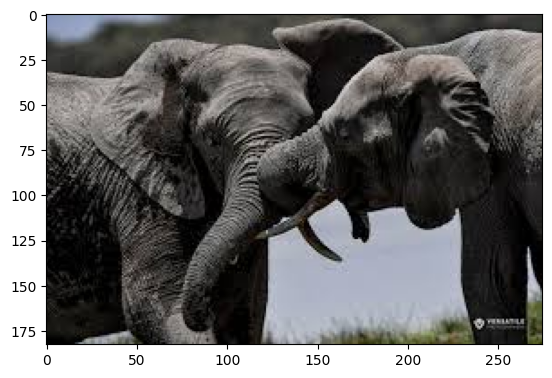

After


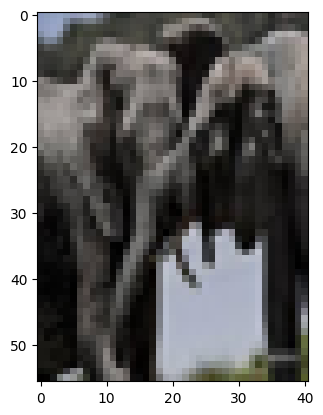

Before


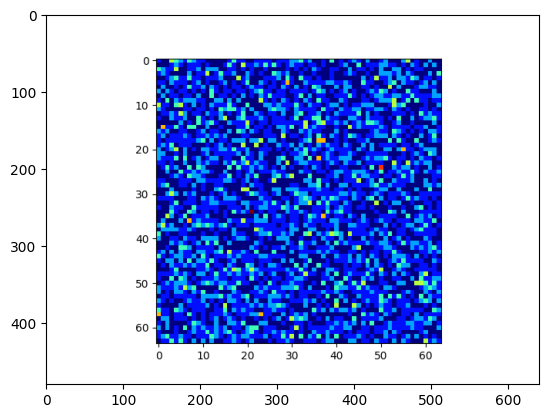

After


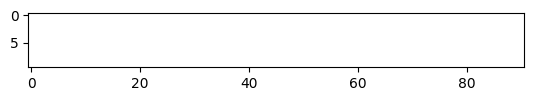

Before


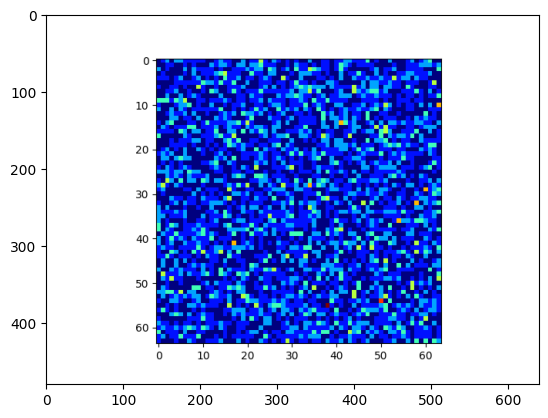

After


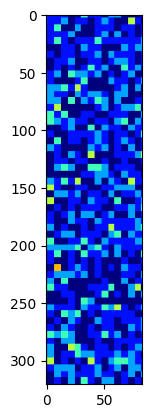

Before


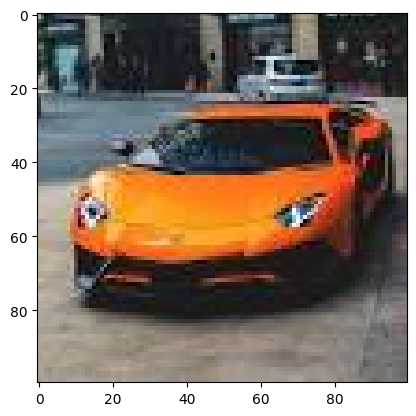

After


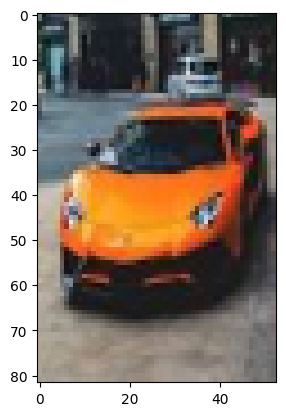

Before


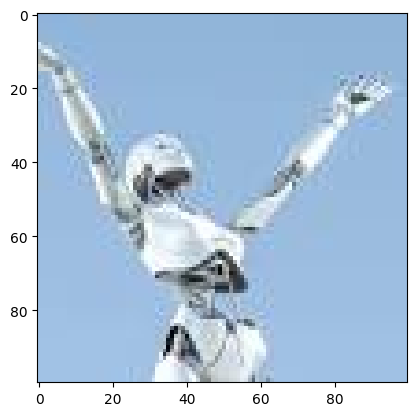

After


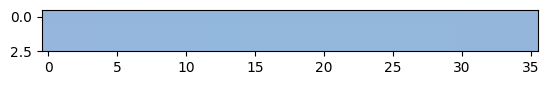

Before


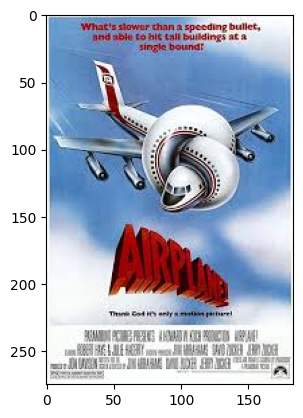

After


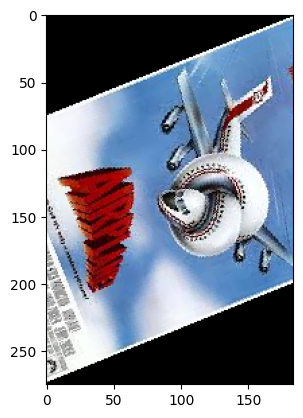

Before


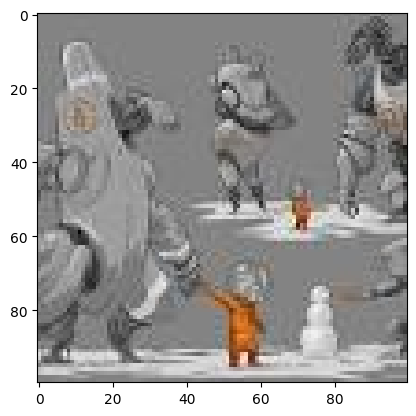

After


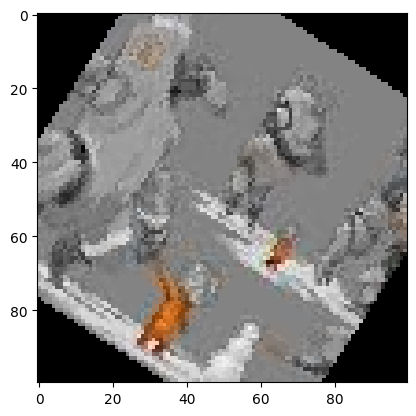

Before


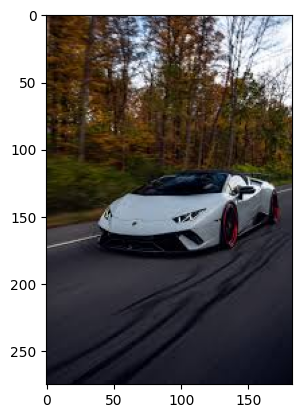

After


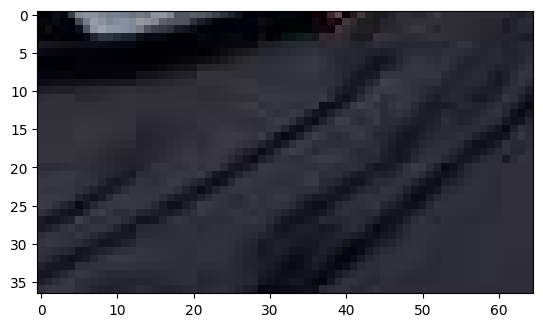

Before


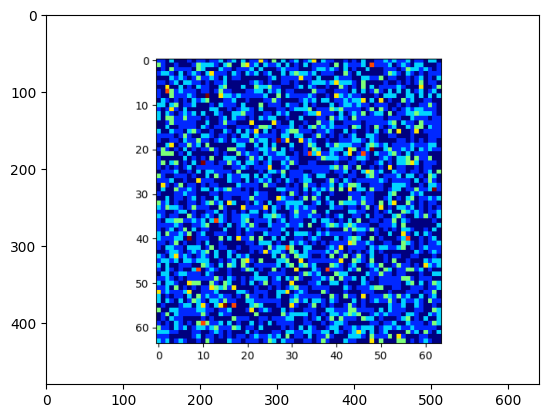

After


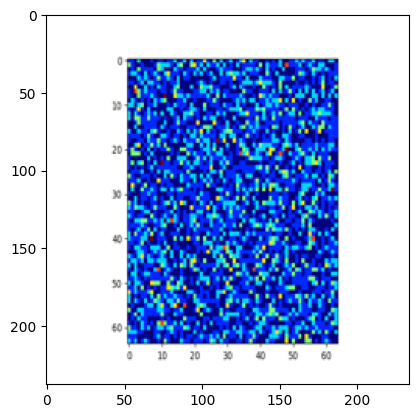

Before


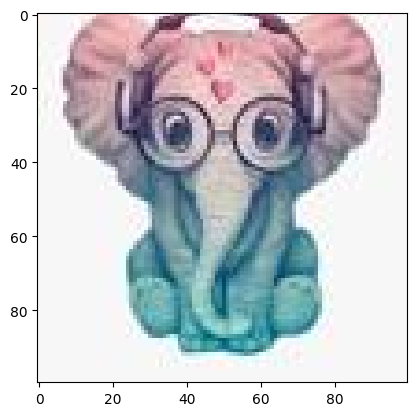

After


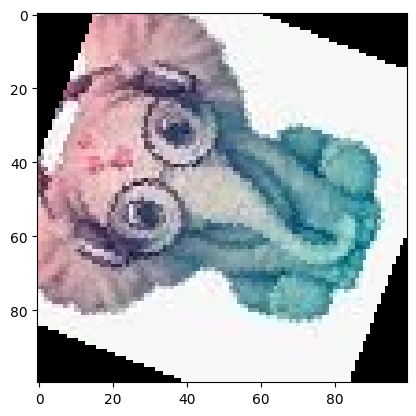

In [ ]:
kj=[]
while(len(kj)!=16):
  value=random.choice(x[random.randint(0,len(l)-1)])
  if(value not in kj):
    kj.append(value)
    img=Image.open(path+"/"+value[1]+"/"+value[0])
    print("Before")
    plt.imshow(np.asarray(img))
    plt.show()
    print("After")
    left=random.randint(1,img.size[0]-1)
    right=left+ (random.randint(1,img.size[0]-left))
    upper=(random.randint(1,img.size[1]-1))
    lower=upper + (random.randint(1,img.size[1]-upper))
    plt.imshow(np.asarray(random.choice([img.rotate(random.randint(1,360)),img.resize((random.randint(1,img.size[0])%img.size[0],random.randint(1,img.size[1])%img.size[1])),img.crop((left,upper,right,lower))])))
    plt.show()

# Part-B Audio Data

[Q1]

Imbalanced


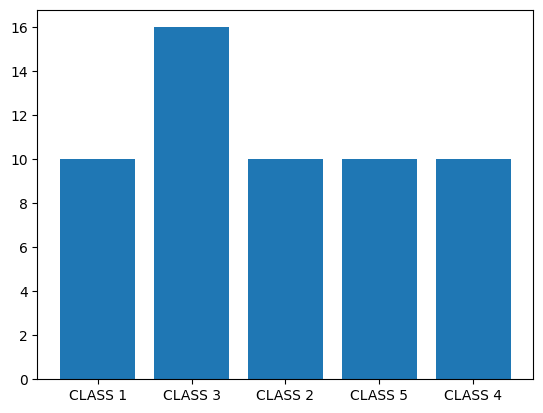

In [ ]:
import os
import matplotlib.pyplot as plt
path = "/content/ml-assignment-1-datasets/AUDIO_DATA/AUDIO_DATA"
l=[]
no_images=[]
imbalenced=False
x=[]
for image_class in os.listdir(path):
  x.append([(image,image_class) for image in os.listdir(path+"/"+str(image_class))]) # if(image.endswith(".jpeg") or image.endswith(".png") or image.endswith(".jpg"))
  no_images.append(len(x[-1]))
  l.append(str(image_class))
prev=no_images[0]
for i in no_images:
  if(i!=prev):
    imbalenced=True
    break;
print("Imbalanced" if(imbalenced) else "balanced" )
if(imbalenced):
  plt.bar(l,no_images)

Clearly our data of audio is imbalanced .

```
To solve this we can either increase no of images of all image classes to 16 (over-sample the dataset)
or
remove extra images from Class 3 to 10 (under sample the dataset)

(our aim -> Simply make no of images of all the image clases equal )
```

[Q2]

Audio spectrogram of randomly selected 4 audios from complete dataset.


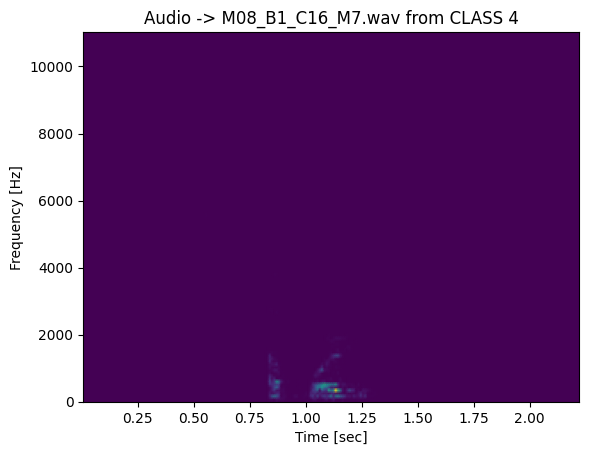

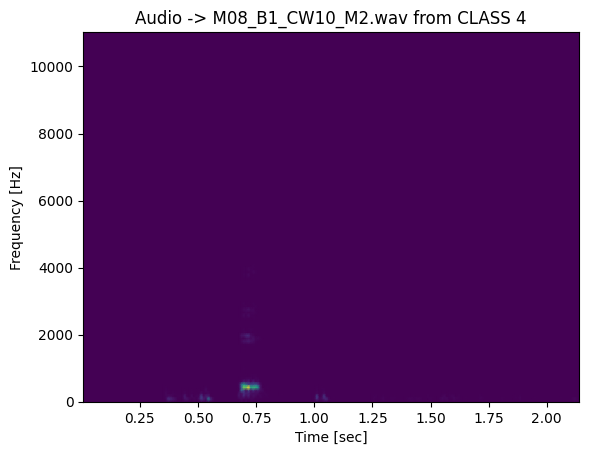

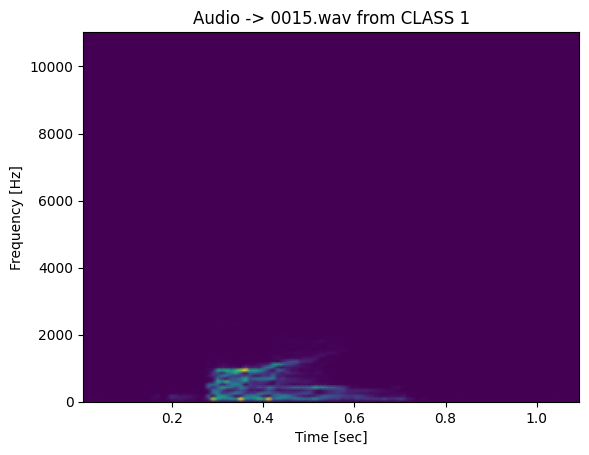

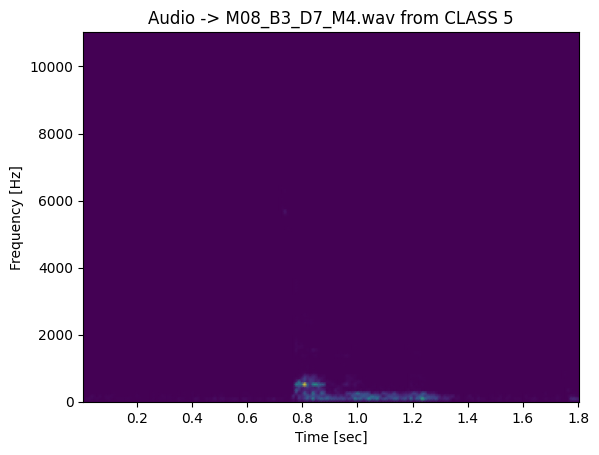

In [ ]:
import librosa
import scipy
print("Audio spectrogram of randomly selected 4 audios from complete dataset.")
kj=[]
while(len(kj)!=4):
  value=random.choice(x[random.randint(0,len(l)-1)])
  if(value not in kj):
    kj.append(value)
    li,mn=librosa.load(path+"/"+value[1]+"/"+value[0])
    f, t, Sxx = scipy.signal.spectrogram(li, mn)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title("Audio -> "+value[0]+" from "+value[1])
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.show()

[Q3]

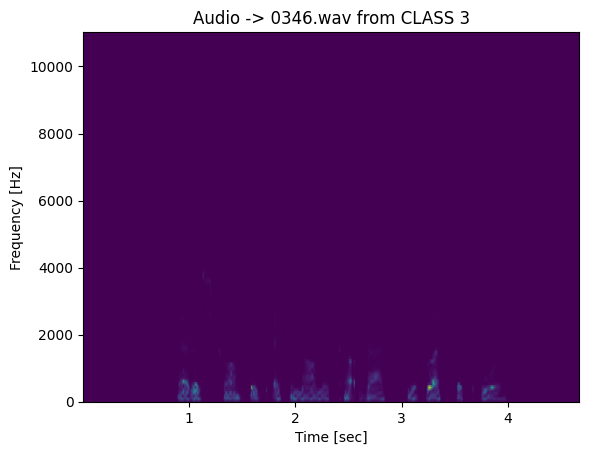

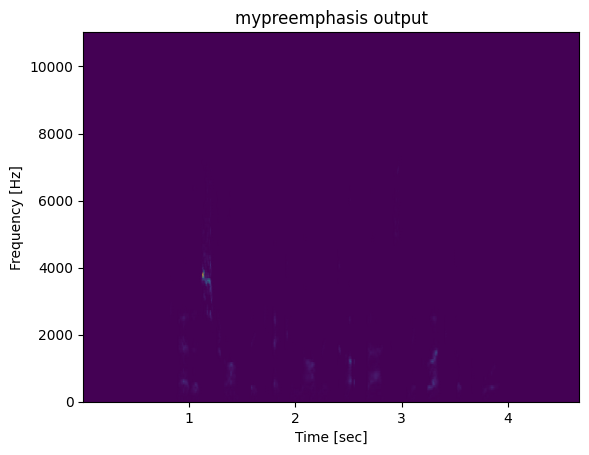

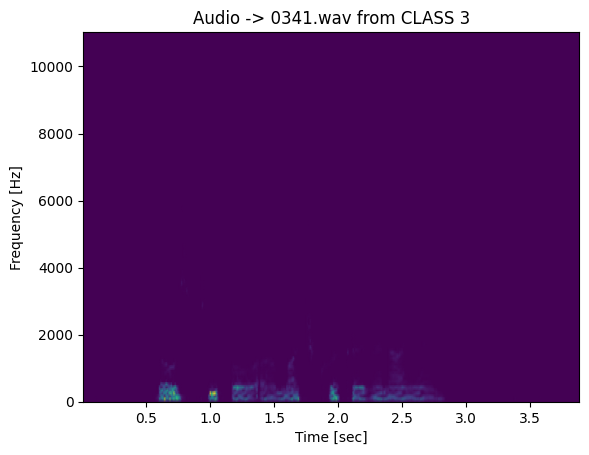

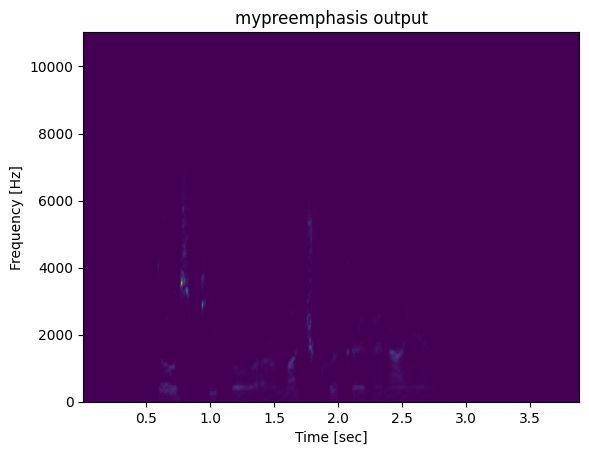

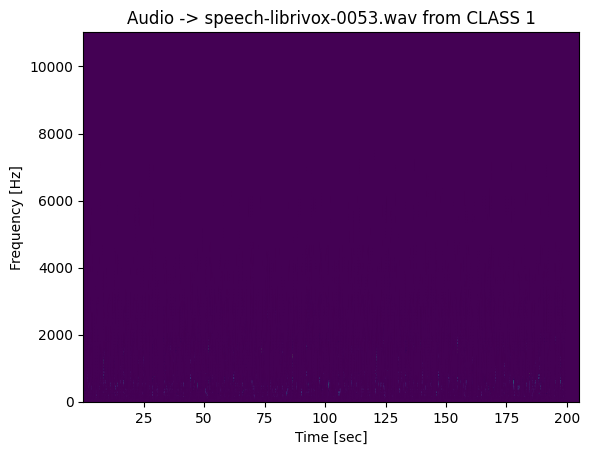

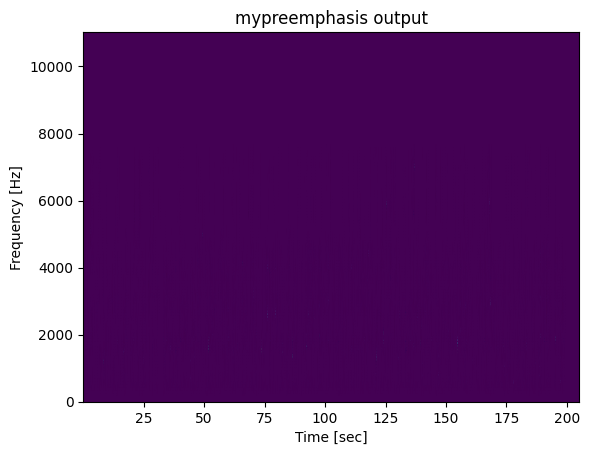

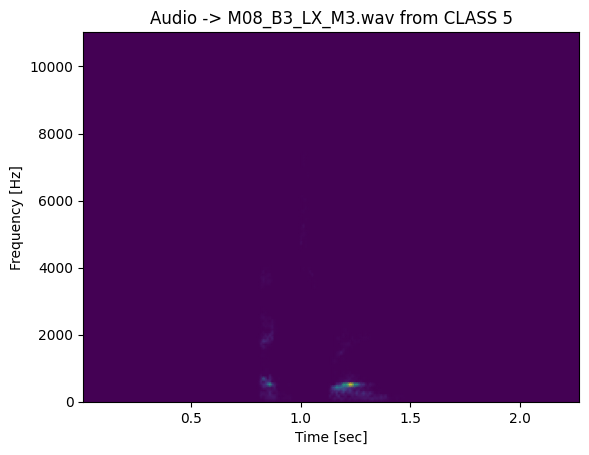

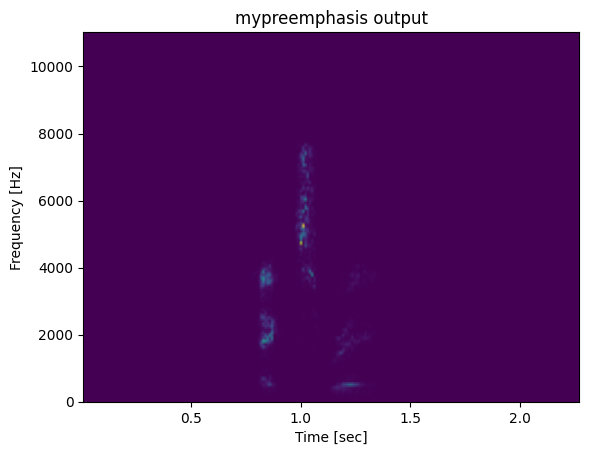

In [ ]:
from scipy import signal as sm
def mypreemphasis(y,conf=0.97):
  b = np.asarray([1.0, -conf], dtype=y.dtype)
  a = np.asarray([1.0], dtype=y.dtype)
  m,jsk=sm.lfilter(b, a, y, zi=np.asarray(np.atleast_1d(2 * y[..., 0:1] - y[..., 1:2]), dtype=y.dtype))
  return m
kj=[]
while(len(kj)!=4):
  value=random.choice(x[random.randint(0,len(l)-1)])
  if(value not in kj):
    kj.append(value)
    li,mn=librosa.load(path+"/"+value[1]+"/"+value[0])
    f, t, Sxx = scipy.signal.spectrogram(li, mn)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title("Audio -> "+value[0]+" from "+value[1])
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.show()
    fg=mypreemphasis(li)
    f, t, Sxx = scipy.signal.spectrogram(fg, mn)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title("mypreemphasis output")
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.show()

Pre-Emphasis ->

```
we boost the amplitude of higher frequency audio signals using filter.

its advantages :
Pre-emphasis boosts treble
Pre-emphasis improves SNR
```



[Q4]

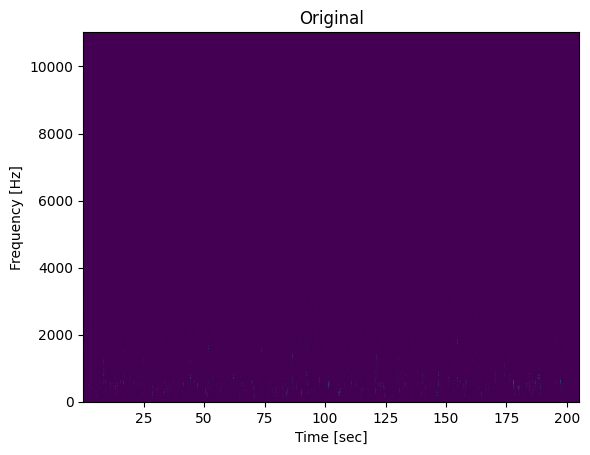

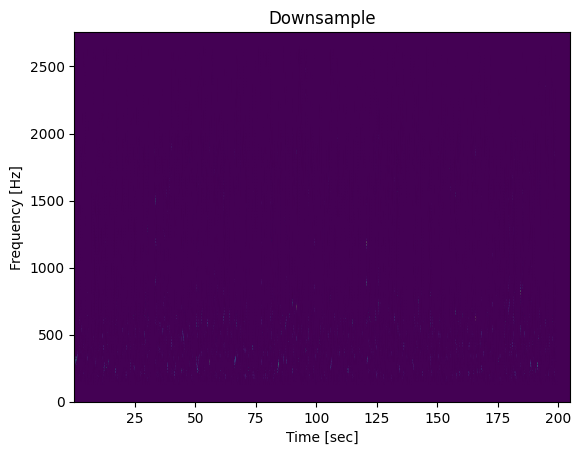

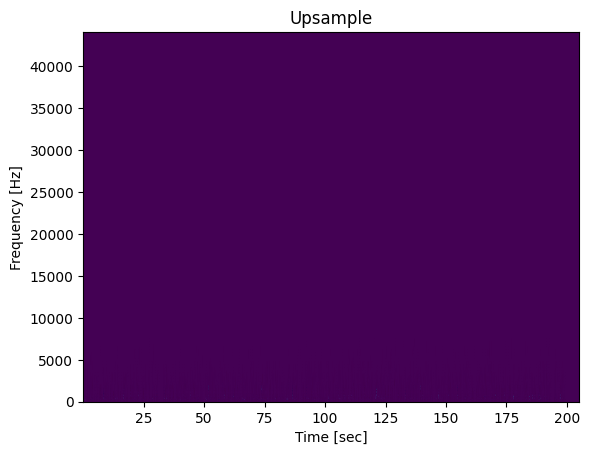

In [ ]:
# import librosa
# import scipy
# import matplotlib.pyplot as plt
y, so = librosa.load("/content/ml-assignment-1-datasets/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav")
# mel_spectrogram = librosa.feature.melspectrogram(scale, sr, n_fft=2048, hop_length=512, n_mels=10, fmax=8000)
# log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
# librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
f, t, Sxx = scipy.signal.spectrogram(y,so)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title("Original")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()
y, sr = librosa.load("/content/ml-assignment-1-datasets/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav", sr=so//4)
f, t, Sxx = scipy.signal.spectrogram(y,sr)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title("Downsample")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()
y, sr = librosa.load("/content/ml-assignment-1-datasets/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav", sr=so*4)
f, t, Sxx = scipy.signal.spectrogram(y,sr)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title("Upsample")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()

Observation ->


```
Upscalling is inreasing sampling rate to get better resolution audio on the othe othe hand Downscalling is decreasing sampling rate which in turn reduces the resolution of the audio.

In fact The resolution part is Quite clear in our ploted spectrogram(s).
```



[Q5]

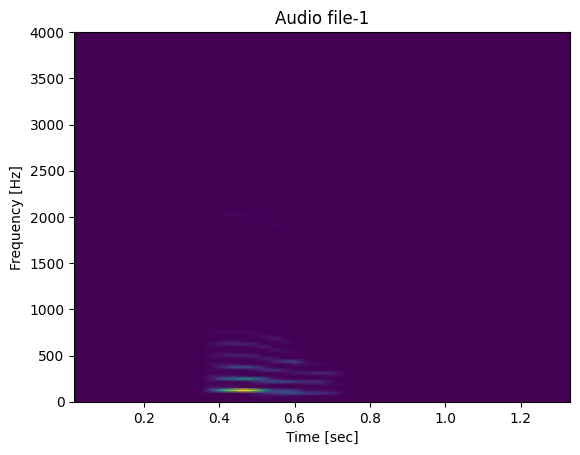

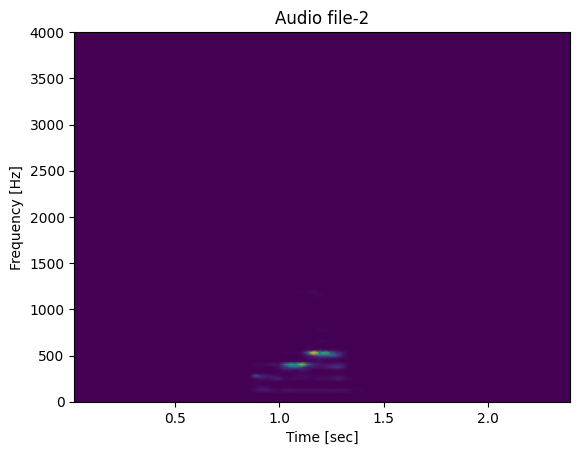

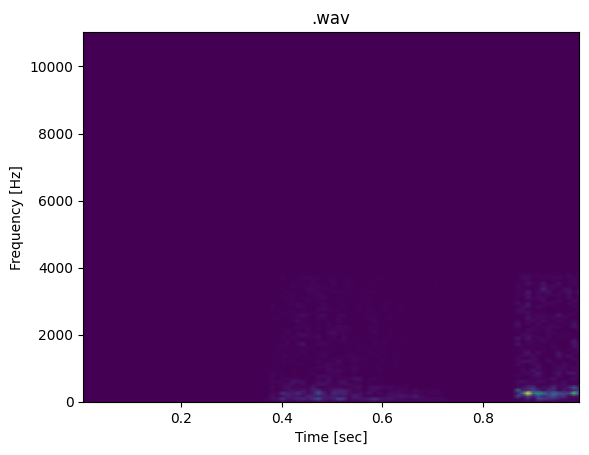

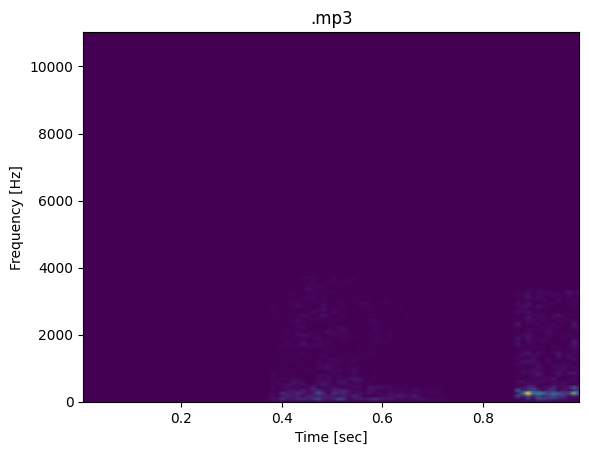

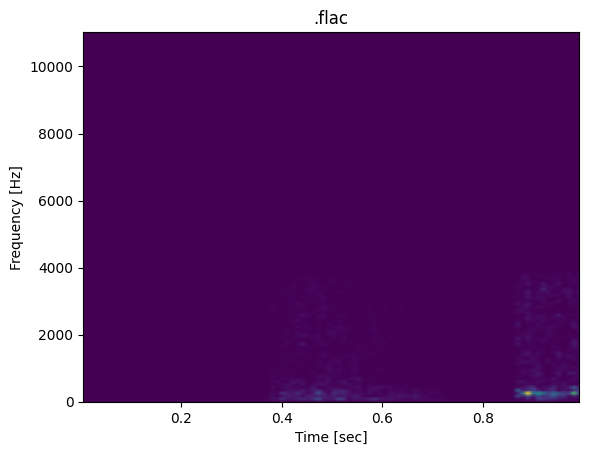

In [ ]:
import soundfile as sf
kj=[]
while(len(kj)!=2):
  value=random.choice(x[random.randint(0,len(l)-1)])
  if(value not in kj):
    li,mn=librosa.load(path+"/"+value[1]+"/"+value[0], sr=8000)
    kj.append([li,mn])
    f, t, Sxx = scipy.signal.spectrogram(li,mn)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title("Audio file-"+str(len(kj)))
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.show()
if(len((kj[1][0]))<2*kj[1][1]):
  kj[1][0]=kj[1][0] + kj[1][0]
kj[1][0]=kj[1][0][:2*kj[1][1]]
if(len((kj[0][0]))<2*kj[0][1]):
  kj[0][0]=kj[0][0] + kj[0][0]
kj[0][0]=kj[0][0][:2*kj[0][1]]
li=[]
for i in range(8000):
  li.append(random.choice([kj[0][0][i],kj[1][0][i]]))
sf.write('audiochange.wav', li, 8000)
sf.write('audiochange.mp3', li, 8000)
sf.write('audiochange.flac', li, 8000)
y, so = librosa.load("/content/audiochange.wav")
f, t, Sxx = scipy.signal.spectrogram(y,so)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title(".wav")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()
y, so = librosa.load("/content/audiochange.mp3")
f, t, Sxx = scipy.signal.spectrogram(y,so)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title(".mp3")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()
y, so = librosa.load("/content/audiochange.flac")
f, t, Sxx = scipy.signal.spectrogram(y,so)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title(".flac")
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()

Observation ->


```
All 3 format files have similar spectrogram plots !!!

( .wav , .mp3 ,.flac )
```



# Part- C Text Dataset

[Q1]

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("/content/ml-assignment-1-datasets/TEXT_DATA/TEXT_DATA/Hindi_English_parallel.csv")
arr=df.to_numpy()
arr=arr[:,1:]
s=0
for i in arr[:,0]:
  s+=len(str(i))
s/=arr.shape[0]
print("English : ",s)
s=0
for i in arr[:,1]:
  s+=len(str(i))
s/=arr.shape[0]
print("Hindi : ",s)

English :  89.6061844757497
Hindi :  86.28161773813947


[Q2]

In [ ]:
#,$,;,.,\',\",],[,{,},*,),(,^,%,@,!,`,~,<,>,?,|,_,-]
df1=df.sample(n=20)
df1['english_sentence']=df1['english_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')
df1['hindi_sentence']=df1['hindi_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')
print("\n\n", df1)



         Unnamed: 0                                   english_sentence  \
50317        50317                     His arguments were convincing    
164426       36819  On the whole during the evening time a rage of...   
79503        79503                                 SurdasIn Hindikunj   
4610          4610  But I think in part  the outcome of the final ...   
37923        37923  And  this condition may refer not only to the ...   
46961        46961  Though western experts relate it to the Syrian...   
44553        44553                      “Im experiencing nothingness”   
144768       17161  Cycling is good exercise to prevent arthritis ...   
84082        84082  that in fact it was a classic charity run by a...   
128817        1210  The body gets strength  intelligence increases...   
17492        17492  which is the old Dravidian name for the planet...   
79624        79624              before the long ride back to the city   
48489        48489                              

<ipython-input-26-8a81a357bac1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['english_sentence']=df1['english_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')
<ipython-input-26-8a81a357bac1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['hindi_sentence']=df1['hindi_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')


[Q3]

In [ ]:
d=dict()
df1=df.sample(n=50)
df1['english_sentence']=df1['english_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')
df1['hindi_sentence']=df1['hindi_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')
key=0
for i in df1['english_sentence']:
  for j in str(i).split():
    if j not in d:
      d[j]=key
      key+=1
for i in df1['hindi_sentence']:
  for j in str(i).split():
    if j not in d:
      d[j]=key
      key+=1
print(d)

{'Havelock': 0, 'can': 1, 'be': 2, 'reached': 3, 'in': 4, '4': 5, 'hours': 6, 'by': 7, 'ferry': 8, 'from': 9, 'Port': 10, 'Blair': 11, 'You': 12, 'find': 13, 'good': 14, 'food': 15, 'anywhere': 16, 'the': 17, 'Jammu': 18, 'city': 19, 'On': 20, 'whole': 21, 'it': 22, 'was': 23, 'a': 24, 'rich': 25, 'and': 26, 'gratifying': 27, 'experience': 28, 'that': 29, 'yellow': 30, 'ones': 31, 'made': 32, 'go': 33, 'red': 34, 'didnt': 35, 'Maximum': 36, 'tourists': 37, 'come': 38, 'to': 39, 'tour': 40, 'western': 41, 'countries': 42, 'because': 43, 'ruins': 44, 'memorials': 45, 'of': 46, 'even': 47, 'more': 48, 'than': 49, 'two': 50, 'thousand': 51, 'year': 52, 'old': 53, 'are': 54, 'found': 55, 'very': 56, 'beautiful': 57, 'fresh': 58, 'state': 59, 'today': 60, 'we': 61, 'only': 62, 'young': 63, 'country': 64, 'an': 65, 'aging': 66, 'world': 67, 'The': 68, 'credit': 69, 'discovery': 70, 'Shailasrey': 71, 'Bhimbetka': 72, 'Shailchitra': 73, 'available': 74, 'them': 75, 'goes': 76, 'Dr': 77, 'Vishnu

<ipython-input-27-815efd5bb4d8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['english_sentence']=df1['english_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')
<ipython-input-27-815efd5bb4d8>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['hindi_sentence']=df1['hindi_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\)]','')


[Q4]

<ipython-input-28-15c44181a197>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  l=Counter([i for row in list(df['english_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\),0,1,2,3,4,5,6,7,8,9]','').str.split()) if(type(row)==type([])) for i in row]).most_common(10)


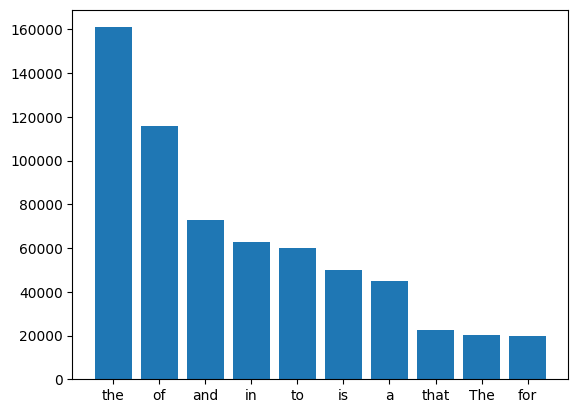



[('the', 160925), ('of', 115635), ('and', 73006), ('in', 62742), ('to', 59925), ('is', 50001), ('a', 45077), ('that', 22317), ('The', 20183), ('for', 19657)]




<ipython-input-28-15c44181a197>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  l=Counter([i for row in list(df['hindi_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\),0,1,2,3,4,5,6,7,8,9]','').str.split()) if(type(row)==type([])) for i in row]).most_common(10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:

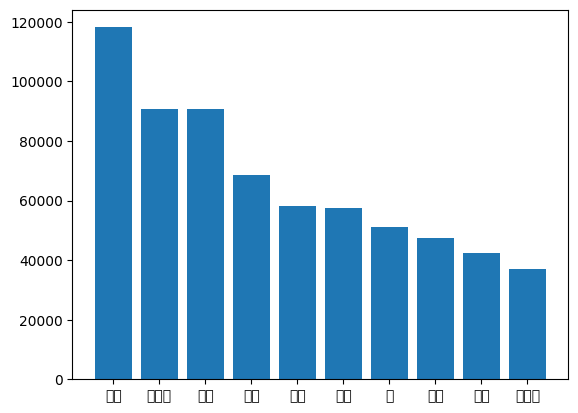



[('के', 118165), ('में', 90760), ('है', 90748), ('की', 68429), ('से', 58114), ('और', 57579), ('।', 51026), ('का', 47403), ('को', 42493), ('हैं', 37169)]




In [ ]:
from collections import Counter
l=Counter([i for row in list(df['english_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\),0,1,2,3,4,5,6,7,8,9]','').str.split()) if(type(row)==type([])) for i in row]).most_common(10)
plt.bar([i[0] for i in l],[i[1] for i in l])
plt.show()
print()
print()
print(l)
print()
print()
l=Counter([i for row in list(df['hindi_sentence'].str.replace(r'[,,-,;,.,?,{,\',\',:,>,<.#,$,@,!,%,^,&,*,\[,\],~,\`,|,+,=,\{,\},\(,\),0,1,2,3,4,5,6,7,8,9]','').str.split()) if(type(row)==type([])) for i in row]).most_common(10)
plt.bar([i[0] for i in l],[i[1] for i in l])
plt.show()
print()
print()
print(l)
print()
print()
